<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/PARCIALSYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#Se importan las librerias que permiten la realización de las respectivas gráficas, calculos y arreglos

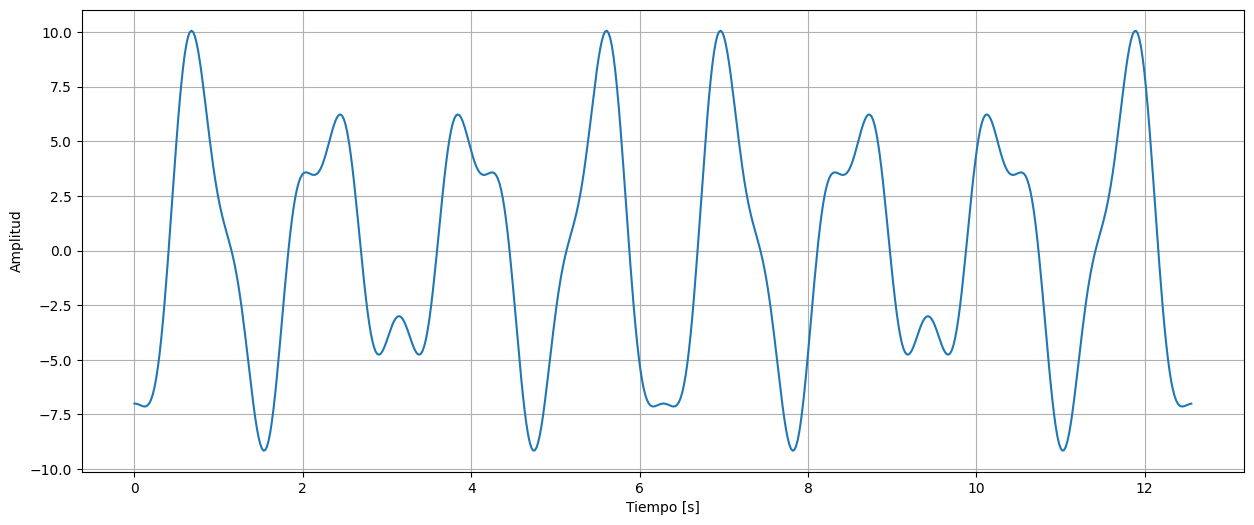

In [69]:
#Definición de la señal x(t)

F = (2/5)*np.pi #Frecuencia, se toma la frecuencia mayor de todas las señales
Fs= 40*F #Frecuencia de muestreo, el 40 hace referencia al numero de muestras
Ts= 1/Fs #Tiempo de muestreo
ti = 0 #Tiempo inicial
tf = 4*np.pi #Tiempo final (corresponde a la cantidad de periodos que quiero observar)
tv = np.arange(ti,tf,Ts) #vector de datos en el tiempo
xv = 7*np.sin(4*tv-(np.pi/2))-2*np.cos(5*tv)+2*np.cos(10*tv) #vector de amplitud de todas las señales

plt.figure(figsize=(15,6))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(tv,xv)
plt.grid()

In [70]:
#Se hace el calculo de cero y pendiente para poder discretizar la señal
ymin=-5  #valor minimo de tension pedido
ymax=5  #valor maximo de tension pedido
def pendiente(x,ymin,ymax):
  xmax=max(x)
  xmin=min(x)
  m=(ymax-ymin)/(xmax-xmin) #calculo de la pendiente
  c=ymin-m*xmin #intercepto
  y=m*x+c #señal generada
  return y

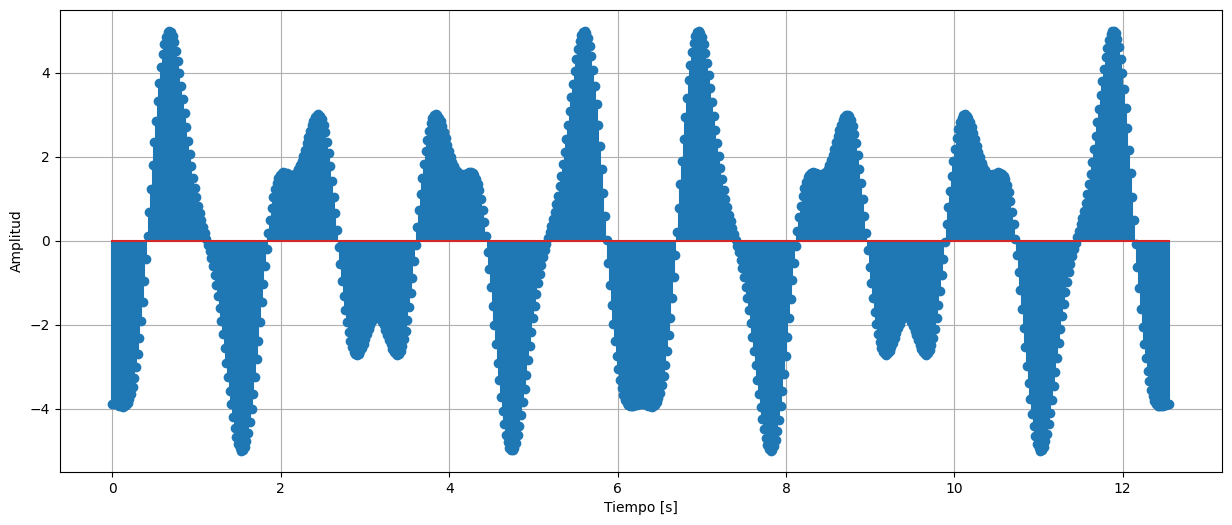

In [71]:
xd = pendiente(xv,ymin,ymax) #Genera la señal discretizada
plt.figure(figsize=(15,6))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.stem(tv,xd)
plt.grid()

#La grafica se ve completamente azul por la cantidad de muestras que se pidio discretizar, no se alcanzan a diferenciar entre si

In [72]:
#Para la cuantización se definen los estados necesarios, en este caso 3 bits corresponden a 8 estados
nbits=3
#Se define nuevamente el rango de tensión en el que se va a trabajar
rmin=-5
rmax=5
#Se define el vector para 8 estados en base a la señal discretizada
ve=np.linspace(rmin,rmax,2**nbits)
d=cdist(xd.reshape(-1,1),ve.reshape(-1,1))
ind=np.argmin(d,axis=1)

In [73]:
#Para la cuantizacion de nuestra señal debemos indexarla al vector de estados previamente diseñado
def cuantizador(xvc,ves):
  Tes=ves.shape[0] #Corresponde al tamaño del vector de estados
  dn=cdist(xvc.reshape(-1,1),ves.reshape(-1,1))
  ind=np.argmin(dn)
  return ves[ind] #Se tiene el vector de estados para la señal x(t)

In [74]:
#Para que la señal se cuantifique correctamente es necesario activar los puntos de la señal necesarios, es decir todos las muestras diferentes de cero
for i in range(xd.shape[0]):
  if i==0:
    xvc=cuantizador(xd[i],ve)
  else:
    xvc=np.append(xvc,cuantizador(xd[i],ve))

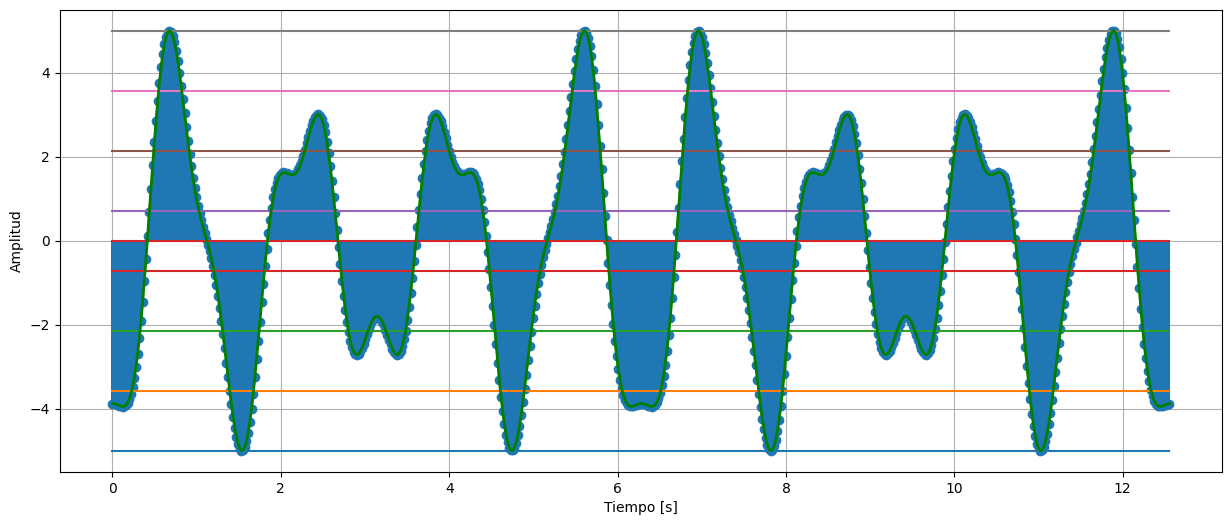

In [75]:
#Ahora se grafican todas las señales
plt.figure(figsize=(15,6))
plt.plot(tv,xd,c='y')#señal continua

plt.stem(tv,xd) #señal discreta

#Estados de cuantización
for v in ve:
  plt.plot(tv,v*np.ones(len(tv))) #Permite visualizar los 8 estados

#Graficar señal Digital (discreta + cuantizada)

plt.plot(tv,xd,c='g',linewidth=2)
plt.grid()
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()